In [28]:
import pandas as pd
df = pd.read_csv('5DATA002W.2 Coursework Dataset(25012025v6.0).csv')
df.head(15)


,Patient_ID,Month_of_Birth,Age,Sex,Occupation,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Reginol_Node_Positive,Survival_Months,Mortality_Status
0,A0012,12,68.0,Female,Teaching,T1,N1,IIA,Poorly differentiated,3,Regional,4.0,Positive,Positive,24.0,1,60,Alive
1,A0013,12,50.0,Female,Medical,T2,N2,IIIA,Moderately differentiated,2,Regional,35.0,Positive,Positive,14.0,5,62,Alive
2,A0014,11,58.0,Female,Engineering,T3,N3,IIIC,Moderately differentiated,2,Regional,63.0,Positive,Positive,14.0,7,75,Alive
3,A0015,3,58.0,Female,Technology,T1,N1,IIA,Poorly differentiated,3,Regional,18.0,Positive,Positive,2.0,1,84,Alive
4,A0016,1,47.0,Female,Multimedia,T2,N1,IIB,Poorly differentiated,3,Regional,41.0,Positive,Positive,3.0,1,50,Alive
5,A0017,2,51.0,Female,Research,T1,N1,IIA,Moderately differentiated,2,Regional,20.0,Positive,Positive,18.0,2,89,Alive
6,A0018,5,51.0,Female,House Person,T1,N1,IIA,Well differentiated,1,Regional,8.0,Positive,Positive,11.0,1,54,Alive
7,A0019,4,40.0,Female,Reporting,T2,N1,IIB,Moderately differentiated,2,Regional,30.0,Positive,Positive,9.0,1,14,Dead
8,A0020,6,40.0,Female,Development,T4,N3,IIIC,Poorly differentiated,3,Regional,103.0,Positive,Positive,20.0,18,70,Alive
9,A0021,4,69.0,Female,Construction,T4,N3,IIIC,Well differentiated,1,Distant,32.0,Positive,Positive,21.0,12,92,Alive


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Patient_ID              4024 non-null   object 
 1   Month_of_Birth          4024 non-null   int64  
 2   Age                     4015 non-null   float64
 3   Sex                     4020 non-null   object 
 4   Occupation              43 non-null     object 
 5   T_Stage                 4024 non-null   object 
 6   N_Stage                 4024 non-null   object 
 7   6th_Stage               4024 non-null   object 
 8   Differentiated          4024 non-null   object 
 9   Grade                   4024 non-null   int64  
 10  A_Stage                 4024 non-null   object 
 11  Tumor_Size              4021 non-null   float64
 12  Estrogen_Status         4024 non-null   object 
 13  Progesterone_Status     4024 non-null   object 
 14  Regional_Node_Examined  4023 non-null   

In [30]:
df.isnull().sum()

Patient_ID                   0
Month_of_Birth               0
Age                          9
Sex                          4
Occupation                3981
T_Stage                      0
N_Stage                      0
6th_Stage                    0
Differentiated               0
Grade                        0
A_Stage                      0
Tumor_Size                   3
Estrogen_Status              0
Progesterone_Status          0
Regional_Node_Examined       1
Reginol_Node_Positive        0
Survival_Months              0
Mortality_Status             0
dtype: int64

In [ ]:
df = pd.get_dummies(df, columns=[
    'Sex', 'T_Stage', 'N_Stage', 'A_Stage',
    'Estrogen_Status', 'Progesterone_Status', 'Differentiated', 'Grade'
], drop_first=True)

In [31]:
for col in ['Sex', 'T_Stage', 'N_Stage', 'A_Stage', 'Mortality_Status']:
    print(f"{col}: {df[col].unique()}")

Sex: ['Female' '1' nan]
T_Stage: ['T1' 'T2' 'T3' 'T4']
N_Stage: ['N1' 'N2' 'N3']
A_Stage: ['Regional' 'Distant']
Mortality_Status: ['Alive' 'Dead' 'ALIVE' 'DEAD' 'ALive' 'alive' 'dead']


In [32]:
# '1' to 'Male', keep 'Female' as is
df['Sex'] = df['Sex'].replace({'1': 'Male'})
# Fill missing values with the most common value
df['Sex'] = df['Sex'].fillna(df['Sex'].mode()[0])

In [33]:
print(df['Sex'].unique())

['Female' 'Male']


In [34]:
print(df['Mortality_Status'].unique())

['Alive' 'Dead' 'ALIVE' 'DEAD' 'ALive' 'alive' 'dead']


In [35]:
# Standardize to lowercase, then capitalize first letter
df['Mortality_Status'] = df['Mortality_Status'].str.lower().str.capitalize()
print(df['Mortality_Status'].unique())

['Alive' 'Dead']


In [36]:
df['Age'] = df['Age'].replace({'502': 52, '180': 80, '-50': 50})

In [37]:
# Consider imputation based on similar patients:
patient_groups = df.groupby(['T_Stage', 'N_Stage', '6th_Stage'])
df['Tumor_Size'] = df.apply(lambda row: row['Tumor_Size'] if not pd.isna(row['Tumor_Size']) 
                          else patient_groups.get_group((row['T_Stage'], row['N_Stage'], row['6th_Stage']))['Tumor_Size'].median(), axis=1)

In [38]:
df['tumor_node_ratio'] = df['Tumor_Size'] / (df['Regional_Node_Examined'] + 1)  # +1 to avoid division by zero
df['positive_node_ratio'] = df['Reginol_Node_Positive'] / (df['Regional_Node_Examined'] + 1)

In [39]:
print(df.isnull().sum())

Patient_ID                   0
Month_of_Birth               0
Age                          9
Sex                          0
Occupation                3981
T_Stage                      0
N_Stage                      0
6th_Stage                    0
Differentiated               0
Grade                        0
A_Stage                      0
Tumor_Size                   0
Estrogen_Status              0
Progesterone_Status          0
Regional_Node_Examined       1
Reginol_Node_Positive        0
Survival_Months              0
Mortality_Status             0
tumor_node_ratio             1
positive_node_ratio          1
dtype: int64


In [40]:
df = df.drop('Occupation', axis=1)

In [41]:
# Impute missing Age with median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Impute missing Tumor_Size with median
df['Tumor_Size'] = df['Tumor_Size'].fillna(df['Tumor_Size'].median())

# Impute missing Regional_Node_Examined with median
df['Regional_Node_Examined'] = df['Regional_Node_Examined'].fillna(df['Regional_Node_Examined'].median())

print(df.isnull().sum())

Patient_ID                0
Month_of_Birth            0
Age                       0
Sex                       0
T_Stage                   0
N_Stage                   0
6th_Stage                 0
Differentiated            0
Grade                     0
A_Stage                   0
Tumor_Size                0
Estrogen_Status           0
Progesterone_Status       0
Regional_Node_Examined    0
Reginol_Node_Positive     0
Survival_Months           0
Mortality_Status          0
tumor_node_ratio          1
positive_node_ratio       1
dtype: int64


categorical variables must be converted to numbers. Use one-hot encoding for variables with no natural order (nominal), and label encoding if there is an order (ordinal).

In [42]:
# One-hot encode all relevant categorical columns
df = pd.get_dummies(df, columns=[
    'Sex', 'T_Stage', 'N_Stage', 'A_Stage',
    'Estrogen_Status', 'Progesterone_Status', 'Differentiated', 'Grade'
], drop_first=True)

In [43]:
df['Mortality_Status'] = df['Mortality_Status'].map({'Alive': 0, 'Dead': 1})

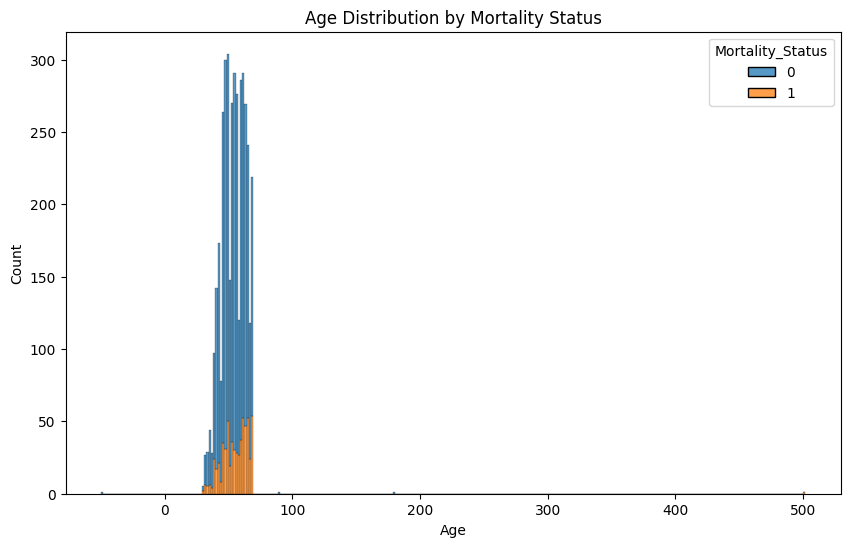

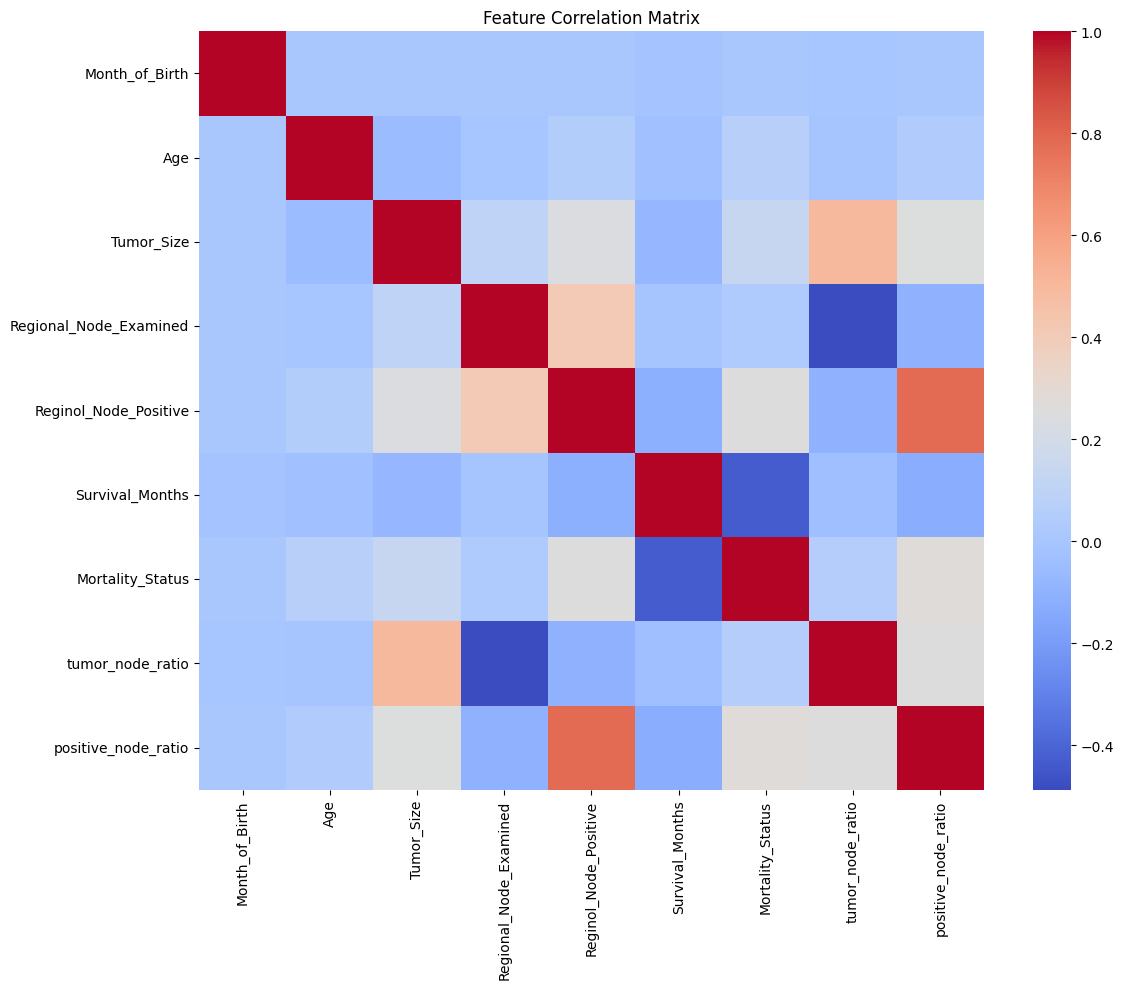

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Mortality_Status', multiple='stack')
plt.title('Age Distribution by Mortality Status')
plt.show()


numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

plt.figure(figsize=(12, 10))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [49]:
# Remove the Patient ID and Month of Birth columns before modeling
X = df.drop(['Patient_ID', 'Month_of_Birth', 'Mortality_Status', 'Survival_Months'], axis=1)
y = df['Mortality_Status']  

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [52]:
# Drop or encode non-numeric columns before scaling
X_train_numeric = X_train.select_dtypes(include=[np.number])
X_test_numeric = X_test.select_dtypes(include=[np.number])

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.metrics import classification_report

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42)
}

# Dictionary to store results
results = {}

from sklearn.impute import SimpleImputer

# Handle missing values in X_train_scaled and X_test_scaled
imputer = SimpleImputer(strategy='mean')
X_train_scaled = imputer.fit_transform(X_train_scaled)
X_test_scaled = imputer.transform(X_test_scaled)

# Train and evaluate each model
for name, model in models.items():
    # Train
    model.fit(X_train_scaled, y_train)
    
    # Predict
    y_pred = model.predict(X_test_scaled)
    
    # Evaluate
    results[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1])
    }
    
    print(f"\n{name} Results:")
    print(f"Accuracy: {results[name]['accuracy']:.4f}")
    print(f"Precision: {results[name]['precision']:.4f}")
    print(f"Recall: {results[name]['recall']:.4f}")
    print(f"F1 Score: {results[name]['f1']:.4f}")
    print(f"ROC AUC: {results[name]['roc_auc']:.4f}")
    
    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))


Logistic Regression Results:
Accuracy: 0.8579
Precision: 0.5000
Recall: 0.0559
F1 Score: 0.1006
ROC AUC: 0.7277

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       863
           1       0.50      0.06      0.10       143

    accuracy                           0.86      1006
   macro avg       0.68      0.52      0.51      1006
weighted avg       0.81      0.86      0.81      1006


Random Forest Results:
Accuracy: 0.8250
Precision: 0.1887
Recall: 0.0699
F1 Score: 0.1020
ROC AUC: 0.6825

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       863
           1       0.19      0.07      0.10       143

    accuracy                           0.83      1006
   macro avg       0.52      0.51      0.50      1006
weighted avg       0.76      0.83      0.79      1006


Gradient Boosting Results:
Accuracy: 0.8479
Precision: 0.3438
Recall: 0.0769


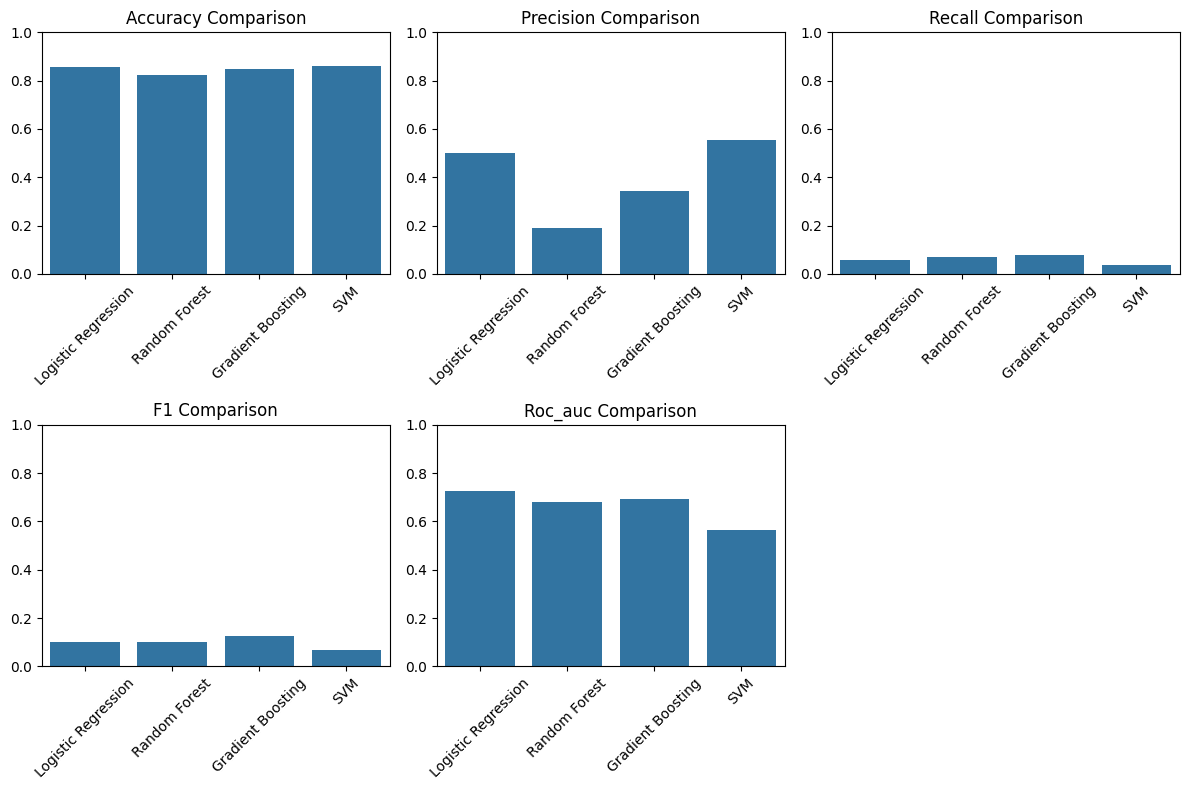

In [55]:
# Visualize model performance
plt.figure(figsize=(12, 8))
metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
model_names = list(results.keys())

for i, metric in enumerate(metrics):
    plt.subplot(2, 3, i+1)
    values = [results[model][metric] for model in model_names]
    sns.barplot(x=model_names, y=values)
    plt.title(f'{metric.capitalize()} Comparison')
    plt.xticks(rotation=45)
    plt.ylim(0, 1)

plt.tight_layout()
plt.show()